In [79]:
import pandas as pd
import os
import numpy as np
%matplotlib inline
#from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from rfpimp import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt

In [2]:
import rfpimp

In [10]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

In [3]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]
    standard_error =results.bse

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               'SE': standard_error,
                               'OR':np.exp(coeff),
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[['OR',"coeff",'SE',"pvals","conf_lower","conf_higher"]]
    return results_df

In [4]:
pwd

'/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/python_scripts'

# READ IN DATA

In [29]:
new_labels_gh={"pushes":'# of pushes', 
              "n_repos": "# of repos", 
               "collaborators":'# of collaborators', 
              "following": '# of followed users',
               "reposwhereactive":'# of repos, where active', 
               'Ruby_Backend': "Ruby Backend",
               "Data_Science": "Data Science",
               "PHP_Frontend": "PHP Frontend",
               'PRo':'# of opened pull requests',
              'Frontend':'Frontend',
              'iOS':'iOS',
              'Backend':"Backend"}

In [30]:
gh_cs=['pushes', 'n_repos', 'reposwhereactive', 'PRo',"following" ,'collaborators',
       'Frontend', 'Ruby_Backend', 'Backend', 'Data_Science', 'iOS', 'PHP_Frontend', "gender_female"]

In [31]:
data_gh_p="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/github/all_sample/"
data_bh_p="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/behance/"

In [ ]:
github_files=os.listdir(data_gh_p)

In [33]:
all_github_files=[]
for f in github_files:
    df=pd.read_csv(data_gh_p+f)
    all_github_files.append(df)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
    

In [35]:
#os.listdir(data_gh_p)

In [36]:
p_out="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/robustness_github/"

In [38]:
data_gh.columns

Index(['userlogin', 'n_repos', 'reposwhereactive', 'pushes', 'collaborators',
       'followers', 'successownrepos', 'successcollabrepos',
       'gendercollaboratorsf', 'gendercollaboratorsm', 'gendercollaboratorsu',
       'male', 'followf', 'followm', 'followu', 'last_activity_on_profile',
       'still_active', 'gender', 'L_JavaScript', 'L_HTML', 'L_CSS', 'L_Python',
       'L_Java', 'L_Ruby', 'L_Shell', 'L_PHP', 'L_Cplusplus', 'L_C',
       'L_Csharp', 'L_ObjectiveC', 'L_Go', 'L_CoffeeScript', 'L_VimL',
       'L_Swift', 'L_TypeScript', 'L_TeX', 'L_Scala', 'L_Perl', 'L_R',
       'L_Jupyter_Notebook', 'L_Lua', 'Makefile', 'number_diff_langs',
       'total_langs', 'L_other_langs', 'year', 'Frontend', 'Ruby_Backend',
       'Backend', 'Data_Science', 'iOS', 'PHP_Frontend', 'g', 'gender_female',
       'gender_male', 'gender_unknown', 'maleness', 'DT_class', 'userlogin.1',
       'PRc', 'PRm', 'PRo'],
      dtype='object')

In [69]:
gh_cs

['pushes',
 'n_repos',
 'reposwhereactive',
 'PRo',
 'following',
 'collaborators',
 'Frontend',
 'Ruby_Backend',
 'Backend',
 'Data_Science',
 'iOS',
 'PHP_Frontend',
 'gender_female']

## GITHUB

In [71]:
data_to_predict_shuffled1

,# of pushes,# of repos,"# of repos, where active",# of opened pull requests,# of followed users,# of collaborators,Frontend,Ruby Backend,Backend,Data Science,iOS,PHP Frontend,gender_female
userlogin,,,,,,,,,,,,,
cprafullchandra,311,9,13,2.0,16.0,3,-6.000359,0.425824,-1.071182,3.884091,-0.798721,-1.002486,0
slaporte,544,26,58,10.0,1020.0,10,10.343479,-8.861657,-2.920425,10.974851,-0.596451,0.758901,0
roim,304,7,14,2.0,18.0,51,-4.275401,-0.615253,0.596842,-1.073606,-0.740398,-0.734137,0
Pheonnexx,785,40,64,21.0,4.0,51,-4.996386,0.056650,-2.171224,2.964989,-0.763619,-0.912851,1
renatosalvatori,48,14,15,0.0,1.0,1,-3.686172,-1.026017,-2.567370,-0.992464,2.594490,19.792510,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
cupcait,78,1,16,6.0,0.0,15,-5.640070,1.647936,-2.213175,-1.867669,-0.654561,-0.607613,1
ohjuju,118,13,15,1.0,0.0,6,-6.208651,0.815663,-2.307759,-1.909728,-0.635146,-0.688445,0
mnaylor,235,10,17,0.0,0.0,7,-4.411693,-0.375354,-1.359648,-0.141550,-0.723535,-0.925870,1


In [141]:
all_github_files[3]['gender'].value_counts().index

Index(['female', 'male', 'unknown', '0'], dtype='object', name='gender')

In [142]:
p_out="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/robustness_github/"
rfcs=[]
i=1
for data_gh in all_github_files:
    print(i)
    cs=gh_cs[:-1]
    data_gh['following']=data_gh['followf']+data_gh['followm']+data_gh['followu']
    data_gh=data_gh[(data_gh['gender']!='unknown') & (data_gh['gender']!='0')]
    data_gh[gh_cs].head()
    print(len(gh_cs), len(list(new_labels_gh.values())))
    # RF
    target='gender_female'
    #cs=gh_cs
    #cs3=list(new_labels_gh.values())
    k=0
    data_to_predict=data_gh[data_gh['gender']!='unknown'].set_index("userlogin")
    #data_to_predict=da[cs].rename(columns=new_labels_gh)
    data_to_predict_shuffled1=data_to_predict.sample(frac=1)
    y1 = data_to_predict_shuffled1[target]
    #churn_feat_space = data_to_predict_shuffled[cs[:-1]]
    #features = churn_feat_space.columns
    X1 = data_to_predict_shuffled1[cs]
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    #RANDOM FOREST
    df_train1, df_test1 = train_test_split(data_to_predict_shuffled1, test_size=0.3,random_state=1)
    X_train1 = df_train1[cs]
    y_train1 = df_train1[target]
    X_test1 = df_test1[cs]
    y_test1 = df_test1[target]

    rfc_gh = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        max_features='sqrt',
        random_state=1,
        n_jobs=-1,
        oob_score=True)

    #rfc_gh.fit(X_train1,y_train1)
    GH_mod=rfc_gh.fit(X_train1,y_train1)

    # predictions
    rfc_predict = rfc_gh.predict(X_test1)

    y_pred1=y1.copy()
    y_pred1[y1.index] = rfc_gh.predict(X1)
    data_to_predict_shuffled1['femaleness_2_new_following']=y_pred1

    print ("Feature space holds %d observations and %d features" % X1.shape)
    print ("Unique target labels:", np.unique(y1))
    data_gh=data_gh.set_index('userlogin').join(data_to_predict_shuffled1['femaleness_2_new_following'])
    
    
    rfc_cv_score = cross_val_score(rfc_gh, data_to_predict_shuffled1[cs], data_to_predict_shuffled1[target],
                                   cv=5, scoring='roc_auc', n_jobs=-1)
    
    print(rfc_cv_score)
    #print("=== Confusion Matrix ===")
   # print(confusion_matrix(y_test1, np.round(rfc_predict)))
    #print('\n')
    #print("=== Classification Report ===")
    #print(classification_report(y_test1, np.round(rfc_predict)))
    #print('\n')
    print("=== All AUC Scores ===")
    print(rfc_cv_score)
    print('\n')
    print("=== Mean AUC Score ===")
    print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
    
    
    print("=== Confusion Matrix ===")
    conf_matrix_df=pd.DataFrame.from_records(confusion_matrix(y_test1, np.round(rfc_predict)))
    print(conf_matrix_df)
    
    print("=== Classification Report ===")
    class_matrix_df=pd.DataFrame.from_dict(classification_report(y_test1, 
                                                             np.round(rfc_predict),output_dict=True)).T

    print(class_matrix_df)
    
    rfcs.append(pd.DataFrame.from_dict({'sample_'+str(i):rfc_cv_score}))
    conf_matrix_df.to_excel(p_out+'confusion_matrix_'+str(i)+'.xlsx')    
    class_matrix_df.to_excel(p_out+'classificaiton_matrix_'+str(i)+'.xlsx')
    data_gh.to_csv(p_out+'GITHUB_sample_data_femaleness'+str(i)+".csv")
    i+=1
pd.concat(rfcs).to_excel(p_out+'rfcs.xlsx')

1
13 12
Feature space holds 19921 observations and 12 features
Unique target labels: [0 1]
[0.64686688 0.65346115 0.63567384 0.65584533 0.6513455 ]
=== All AUC Scores ===
[0.64686688 0.65346115 0.63567384 0.65584533 0.6513455 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.648638539971539
=== Confusion Matrix ===
      0     1
0  1916   992
1  1390  1679
=== Classification Report ===
              precision    recall  f1-score      support
0              0.579552  0.658872  0.616672  2908.000000
1              0.628604  0.547084  0.585017  3069.000000
accuracy       0.601472  0.601472  0.601472     0.601472
macro avg      0.604078  0.602978  0.600845  5977.000000
weighted avg   0.604739  0.601472  0.600418  5977.000000
2
13 12
Feature space holds 19908 observations and 12 features
Unique target labels: [0 1]
[0.64213497 0.65727852 0.64302478 0.6480336  0.66433049]
=== All AUC Scores ===
[0.64213497 0.65727852 0.64302478 0.6480336  0.66433049]


=== Mean AUC Score ===
Mean

In [64]:
#res_gh

<Axes: >

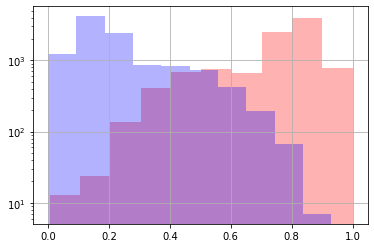

In [65]:
ax=data_to_predict_shuffled1[data_to_predict_shuffled1['gender_female']==1]['femaleness_2_new_following'].hist(log=True, color="red", alpha=0.3)
data_to_predict_shuffled1[data_to_predict_shuffled1['gender_female']==0]['femaleness_2_new_following'].hist(ax=ax, log=True, color="blue", alpha=0.3)

# BEHANCE RF

In [98]:
data_bh_p="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/behance/"
behance_files=os.listdir(data_bh_p)
all_behance_files=[]
for f in behance_files:
    if f.startswith('behance_filtered_sample_min10_'):
        df=pd.read_csv(data_bh_p+f)
        all_behance_files.append(df)

In [99]:
len(all_behance_files)

5

In [146]:
all_behance_files[3]['gender'].value_counts()

gender
male      6000
female    6000
Name: count, dtype: int64

In [100]:
#data_bh=pd.read_csv(data_bh_p+"sample1_with_femaleness_PCA_survival_contributors.csv")

In [101]:
bh_cs=['total_activity', 'project_counts','comments', "following",
       'Photography', 'Graphic_Design', 'Branding',
       'Art_Direction', 'Digital_Art', 'Fashion_Photography', 'Fine_Arts',
       'Web_design_UX', "gender_female"]

In [102]:
new_labels_bh={"project_counts":'# of projects', 
               'total_activity': 'Total activity',
              "comments": "# of comments", 
              "following": '# of followed users',
               "Graphic_Design":"Graphic Design",
               "Web_design_UX":'Web design & UX', 
               'Digital_Art': "Digital Art",
               "Fashion_Photography": "Fashion Photography",
               "Art_Direction": "Art Direction",
               'Fine_Arts':'Fine Arts', 
              'Branding':"Branding",
              'Photography':'Photography'}

In [103]:
data_bh.head()

,user_id,fields,followers,following,username,gender,country,comments,project_counts,project_views,...,gender_male,femaleness_2_new,last_activity,survival,user_id.1,survival2,survivial_clean,number_of_contributors,gender_female,gender_male
0,4275179,Graphic Design|Art Direction|Illustration,36,311,guillermotheill,male,Argentina,9,13,948,...,1,0.357656,2018-06-05 17:45:49,1.0,4275179,1,1,2.0,False,True
1,94389,Photography|Fine Arts|Photojournalism,802,262,ijazz,male,France,820,79,79762,...,1,0.485360,2018-09-29 21:39:18,1.0,94389,1,1,0.0,False,True
2,52539,Art Direction|Illustration|Graphic Design,4139,2786,akaempk,male,Spain,362,86,282573,...,1,0.250185,2016-05-05 07:58:55,0.0,52539,0,1,1.0,False,True
3,4831337,Illustration|Graphic Design|Advertising,115,1946,angelo_at,male,Peru,2,13,3446,...,1,0.281127,2018-01-29 20:01:29,1.0,4831337,1,1,2.0,False,True
4,93415,Pattern Design|Textile Design|Print Design,615,593,keenlight,male,Russian Federation,574,4,1072,...,1,0.324069,2014-01-22 17:47:46,0.0,93415,0,1,0.0,False,True


In [97]:
len(all_behance_files)

7

In [104]:
p_out="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/robustness_behance/"
rfcs=[]
i=1
for data_bh in all_behance_files:
    print(i)
    cs=bh_cs[:-1]
    #data_bh['following']=data_bh['followf']+data_bh['followm']+data_bh['followu']
    data_bh=data_bh[data_bh['gender']!='unknown']
    if 'femaleness_2_new_following' in data_bh.columns:
        del data_bh['femaleness_2_new_following']
    else:
        data_bh=data_bh.join(pd.get_dummies(data_bh['gender']))
        data_bh[['female','male']].replace(True, 1).replace(False, 0)
        data_bh=data_bh.rename(columns={'female':"gender_female",'male':"gender_male"})
    data_bh[bh_cs].head()
    print(len(bh_cs), len(list(new_labels_bh.values())))
    # RF
    target='gender_female'
    #cs=gh_cs
    #cs3=list(new_labels_gh.values())
    k=0
    data_to_predict=data_bh[data_bh['gender']!='unknown'].set_index("user_id").replace(np.nan,0)
    #data_to_predict=da[cs].rename(columns=new_labels_gh)
    data_to_predict_shuffled1=data_to_predict.sample(frac=1)
    y1 = data_to_predict_shuffled1[target]
    #churn_feat_space = data_to_predict_shuffled[cs[:-1]]
    #features = churn_feat_space.columns
    X1 = data_to_predict_shuffled1[cs]
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    #RANDOM FOREST
    df_train1, df_test1 = train_test_split(data_to_predict_shuffled1, test_size=0.3,random_state=1)
    X_train1 = df_train1[cs]
    y_train1 = df_train1[target]
    X_test1 = df_test1[cs]
    y_test1 = df_test1[target]

    rfc_bh = RandomForestRegressor(
        n_estimators=1400,
        max_depth=100,
        max_features='auto',
        random_state=1,
        n_jobs=-1,
        min_samples_leaf=10,
        warm_start= False,
        oob_score=True)
    BH_mod=rfc_bh.fit(X_train1,y_train1)

    # predictions
    rfc_predict = rfc_bh.predict(X_test1)

    y_pred1=y1.copy()
    y_pred1[y1.index] = rfc_bh.predict(X1)
    data_to_predict_shuffled1['femaleness_2_new_following']=y_pred1

    print ("Feature space holds %d observations and %d features" % X1.shape)
    print ("Unique target labels:", np.unique(y1))
    data_bh=data_bh.set_index('user_id').join(data_to_predict_shuffled1['femaleness_2_new_following'])
    
    
    rfc_cv_score = cross_val_score(rfc_bh, data_to_predict_shuffled1[cs], data_to_predict_shuffled1[target],
                                   cv=5, scoring='roc_auc', n_jobs=-1)
    
    print(rfc_cv_score)
    #print("=== Confusion Matrix ===")
   # print(confusion_matrix(y_test1, np.round(rfc_predict)))
    #print('\n')
    #print("=== Classification Report ===")
    #print(classification_report(y_test1, np.round(rfc_predict)))
    #print('\n')
    print("=== All AUC Scores ===")
    print(rfc_cv_score)
    print('\n')
    print("=== Mean AUC Score ===")
    print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
    
    
    print("=== Confusion Matrix ===")
    conf_matrix_df=pd.DataFrame.from_records(confusion_matrix(y_test1, np.round(rfc_predict)))
    print(conf_matrix_df)
    
    print("=== Classification Report ===")
    class_matrix_df=pd.DataFrame.from_dict(classification_report(y_test1, 
                                                             np.round(rfc_predict),output_dict=True)).T

    print(class_matrix_df)
    
    rfcs.append(pd.DataFrame.from_dict({'sample_'+str(i):rfc_cv_score}))
    conf_matrix_df.to_excel(p_out+'confusion_matrix_'+str(i)+'.xlsx')    
    class_matrix_df.to_excel(p_out+'classificaiton_matrix_'+str(i)+'.xlsx')
    data_bh.to_csv(p_out+'BEHANCE_sample_data_femaleness'+str(i)+".csv")
    i+=1
pd.concat(rfcs).to_excel(p_out+'rfcs.xlsx')

1
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [False  True]
[0.69025141 0.66390662 0.69248714 0.67361877 0.6903996 ]
=== All AUC Scores ===
[0.69025141 0.66390662 0.69248714 0.67361877 0.6903996 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6821327063517876
=== Confusion Matrix ===
      0     1
0  1093   673
1   682  1152
=== Classification Report ===
              precision    recall  f1-score      support
False          0.615775  0.618913  0.617340  1766.000000
True           0.631233  0.628135  0.629680  1834.000000
accuracy       0.623611  0.623611  0.623611     0.623611
macro avg      0.623504  0.623524  0.623510  3600.000000
weighted avg   0.623650  0.623611  0.623627  3600.000000
2
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [False  True]
[0.67700798 0.67321576 0.66811219 0.69238459 0.67465935]
=== All AUC Scores ===
[0.67700798 0.67321576 0.66811219 0.69238459 0.67465935]


=== Mean A

# GENDER ROBUSTNESS

In [109]:
len(data_gh[data_gh['gender_female']==1])

10000

In [135]:
data_gh_p="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/github/"
#data_bh_p="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/behance/"
github_df=pd.read_csv(data_gh_p+"topsamples60d10P_allsample01_20181018_3.csv")

<ipython-input-135-2434688747f3>:3: DtypeWarning: Columns (0,74) have mixed types. Specify dtype option on import or set low_memory=False.
  github_df=pd.read_csv(data_gh_p+"topsamples60d10P_allsample01_20181018_3.csv")


In [136]:
github_df['gender'].value_counts()

gender
female     10000
male       10000
unknown    10000
Name: count, dtype: int64

In [151]:
from collections import defaultdict

In [164]:
rub_github=defaultdict(list)
for fc in [.05,.10,.25]:
    res=[]
    print(fc)
    for j in range(0,100):
        github_df=github_df.sample(frac=1)
        slice_=int(10000*fc)
        github_df=github_df[github_df['gender']!='unknown']
        sample_female=github_df[github_df['gender_female']==1][:slice_]
        sample_male=github_df[github_df['gender_female']==0][:slice_]
        sample_female['new_gender']=0
        sample_male['new_gender']=1
        rest_women=github_df[github_df['gender_female']==1][slice_:]
        rest_men=github_df[github_df['gender_female']==0][slice_:]
        rest_women['new_gender']=rest_women['gender_female']
        rest_men['new_gender']=rest_men['gender_female']
        github_new=pd.concat([sample_female,sample_male,rest_women,rest_men])
        res.append(github_new)
    rub_github[fc]=res

    

0.05
0.1
0.25


In [178]:
for fc,robs in rub_github.items():
    i=1
    if fc!=0.05:
        for data_gh in robs:
            res=[]
            print(fc)
            print(i)
            cs=gh_cs[:-1]
            data_gh['following']=data_gh['followf']+data_gh['followm']+data_gh['followu']
            #data_gh=data_gh[(data_gh['gender']!='unknown') & (data_gh['gender']!='0')]
            data_gh[gh_cs].head()
            print(len(gh_cs), len(list(new_labels_gh.values())))
            # RF
            target='new_gender'
            #cs=gh_cs
            #cs3=list(new_labels_gh.values())
            k=0
            data_to_predict=data_gh.set_index("userlogin")
            #data_to_predict=da[cs].rename(columns=new_labels_gh)
            data_to_predict_shuffled1=data_to_predict.sample(frac=1)
            y1 = data_to_predict_shuffled1[target]
            #churn_feat_space = data_to_predict_shuffled[cs[:-1]]
            #features = churn_feat_space.columns
            X1 = data_to_predict_shuffled1[cs]
            #scaler = StandardScaler()
            #X = scaler.fit_transform(X)

            #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
            #RANDOM FOREST
            df_train1, df_test1 = train_test_split(data_to_predict_shuffled1, test_size=0.3,random_state=1)
            X_train1 = df_train1[cs]
            y_train1 = df_train1[target]
            X_test1 = df_test1[cs]
            y_test1 = df_test1[target]

            rfc_gh = RandomForestRegressor(
                n_estimators=200,
                max_depth=None,
                max_features='sqrt',
                random_state=1,
                n_jobs=-1,
                oob_score=True)

            #rfc_gh.fit(X_train1,y_train1)
            GH_mod=rfc_gh.fit(X_train1,y_train1)

            # predictions
            rfc_predict = rfc_gh.predict(X_test1)

            y_pred1=y1.copy()
            y_pred1[y1.index] = rfc_gh.predict(X1)
            data_to_predict_shuffled1['femaleness_2_new_following']=y_pred1

            print ("Feature space holds %d observations and %d features" % X1.shape)
            print ("Unique target labels:", np.unique(y1))
            data_gh=data_gh.set_index('userlogin').join(data_to_predict_shuffled1['femaleness_2_new_following'])


            rfc_cv_score = cross_val_score(rfc_gh, data_to_predict_shuffled1[cs], data_to_predict_shuffled1[target],
                                           cv=5, scoring='roc_auc', n_jobs=-1)

            print(rfc_cv_score)
            #print("=== Confusion Matrix ===")
           # print(confusion_matrix(y_test1, np.round(rfc_predict)))
            #print('\n')
            #print("=== Classification Report ===")
            #print(classification_report(y_test1, np.round(rfc_predict)))
            #print('\n')
            print("=== All AUC Scores ===")
            print(rfc_cv_score)
            print('\n')
            print("=== Mean AUC Score ===")
            print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


            print("=== Confusion Matrix ===")
            conf_matrix_df=pd.DataFrame.from_records(confusion_matrix(y_test1, np.round(rfc_predict)))
            print(conf_matrix_df)

            print("=== Classification Report ===")
            class_matrix_df=pd.DataFrame.from_dict(classification_report(y_test1, 
                                                                     np.round(rfc_predict),output_dict=True)).T

            print(class_matrix_df)
            p_out='/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/robbustness_github_gender_swap/r'+str(fc)[2:]+"/"

            rfcs.append(pd.DataFrame.from_dict({'sample_'+str(i):rfc_cv_score}))
            conf_matrix_df.to_excel(p_out+'confusion_matrix_'+str(i)+'.xlsx')    
            class_matrix_df.to_excel(p_out+'classificaiton_matrix_'+str(i)+'.xlsx')
            data_gh.to_csv(p_out+'GITHUB_sample_data_femaleness'+str(i)+".csv")
            i+=1
        pd.concat(rfcs).to_excel(p_out+'rfcs.xlsx')

0.1
1
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.60370202 0.59407072 0.60461747 0.59196597 0.59710319]
=== All AUC Scores ===
[0.60370202 0.59407072 0.60461747 0.59196597 0.59710319]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5982918737264363
=== Confusion Matrix ===
      0     1
0  1833  1170
1  1424  1573
=== Classification Report ===
              precision    recall  f1-score      support
0              0.562788  0.610390  0.585623  3003.000000
1              0.573460  0.524858  0.548084  2997.000000
accuracy       0.567667  0.567667  0.567667     0.567667
macro avg      0.568124  0.567624  0.566853  6000.000000
weighted avg   0.568118  0.567667  0.566872  6000.000000
0.1
2
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.60388914 0.62086603 0.60095556 0.59658918 0.59751223]
=== All AUC Scores ===
[0.60388914 0.62086603 0.60095556 0.59658918 0.59751223]


=== Mean AUC Score

Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.60020337 0.59961152 0.59599153 0.58331352 0.59808803]
=== All AUC Scores ===
[0.60020337 0.59961152 0.59599153 0.58331352 0.59808803]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5954415943095871
=== Confusion Matrix ===
      0     1
0  1831  1174
1  1386  1609
=== Classification Report ===
              precision    recall  f1-score      support
0              0.569164  0.609318  0.588557  3005.000000
1              0.578153  0.537229  0.556940  2995.000000
accuracy       0.573333  0.573333  0.573333     0.573333
macro avg      0.573658  0.573273  0.572748  6000.000000
weighted avg   0.573651  0.573333  0.572775  6000.000000
0.1
13
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.61002526 0.59069119 0.58996527 0.60239334 0.5920842 ]
=== All AUC Scores ===
[0.61002526 0.59069119 0.58996527 0.60239334 0.5920842 ]


=== Mean AUC Score ===
Mean A

0.1
23
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.60544738 0.60846337 0.60683363 0.61338574 0.58696706]
=== All AUC Scores ===
[0.60544738 0.60846337 0.60683363 0.61338574 0.58696706]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.604219433381186
=== Confusion Matrix ===
      0     1
0  1802  1213
1  1363  1622
=== Classification Report ===
              precision    recall  f1-score      support
0              0.569352  0.597678  0.583172  3015.000000
1              0.572134  0.543384  0.557388  2985.000000
accuracy       0.570667  0.570667  0.570667     0.570667
macro avg      0.570743  0.570531  0.570280  6000.000000
weighted avg   0.570736  0.570667  0.570344  6000.000000
0.1
24
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.62463016 0.61365003 0.6023052  0.61578271 0.59266223]
=== All AUC Scores ===
[0.62463016 0.61365003 0.6023052  0.61578271 0.59266223]


=== Mean AUC Scor

0.1
34
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.61485684 0.59907994 0.59905619 0.60046239 0.6060853 ]
=== All AUC Scores ===
[0.61485684 0.59907994 0.59905619 0.60046239 0.6060853 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6039081321479969
=== Confusion Matrix ===
      0     1
0  1816  1199
1  1377  1608
=== Classification Report ===
              precision    recall  f1-score      support
0              0.568744  0.602322  0.585052  3015.000000
1              0.572854  0.538693  0.555249  2985.000000
accuracy       0.570667  0.570667  0.570667     0.570667
macro avg      0.570799  0.570508  0.570150  6000.000000
weighted avg   0.570789  0.570667  0.570225  6000.000000
0.1
35
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.61752395 0.59589253 0.61531548 0.59923315 0.60824948]
=== All AUC Scores ===
[0.61752395 0.59589253 0.61531548 0.59923315 0.60824948]


=== Mean AUC Sco

[0.60091878 0.59896093 0.59746386 0.5964747  0.60975919]
=== All AUC Scores ===
[0.60091878 0.59896093 0.59746386 0.5964747  0.60975919]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6007154920695006
=== Confusion Matrix ===
      0     1
0  1749  1350
1  1236  1665
=== Classification Report ===
              precision    recall  f1-score   support
0              0.585930  0.564376  0.574951  3099.000
1              0.552239  0.573940  0.562880  2901.000
accuracy       0.569000  0.569000  0.569000     0.569
macro avg      0.569084  0.569158  0.568916  6000.000
weighted avg   0.569640  0.569000  0.569115  6000.000
0.1
46
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.59850905 0.61894528 0.58633946 0.60342043 0.60010817]
=== All AUC Scores ===
[0.59850905 0.61894528 0.58633946 0.60342043 0.60010817]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6014644765787635
=== Confusion Matrix ===
      0     1
0  1799  1237
1 

0.1
57
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.60584374 0.59601407 0.59881614 0.61862928 0.59109162]
=== All AUC Scores ===
[0.60584374 0.59601407 0.59881614 0.61862928 0.59109162]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6020789703297147
=== Confusion Matrix ===
      0     1
0  1808  1208
1  1362  1622
=== Classification Report ===
              precision    recall  f1-score      support
0              0.570347  0.599469  0.584546  3016.000000
1              0.573145  0.543566  0.557964  2984.000000
accuracy       0.571667  0.571667  0.571667     0.571667
macro avg      0.571746  0.571518  0.571255  6000.000000
weighted avg   0.571738  0.571667  0.571326  6000.000000
0.1
58
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.60386184 0.60797766 0.61710168 0.61028916 0.59821852]
=== All AUC Scores ===
[0.60386184 0.60797766 0.61710168 0.61028916 0.59821852]


=== Mean AUC Sco

0.1
68
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.61365345 0.59440772 0.60332386 0.58757693 0.59492412]
=== All AUC Scores ===
[0.61365345 0.59440772 0.60332386 0.58757693 0.59492412]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.598777218674118
=== Confusion Matrix ===
      0     1
0  1806  1203
1  1334  1657
=== Classification Report ===
              precision    recall  f1-score      support
0              0.575159  0.600199  0.587413  3009.000000
1              0.579371  0.553995  0.566399  2991.000000
accuracy       0.577167  0.577167  0.577167     0.577167
macro avg      0.577265  0.577097  0.576906  6000.000000
weighted avg   0.577259  0.577167  0.576937  6000.000000
0.1
69
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.60504603 0.5933532  0.58568569 0.59973013 0.59679757]
=== All AUC Scores ===
[0.60504603 0.5933532  0.58568569 0.59973013 0.59679757]


=== Mean AUC Scor

Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.58889883 0.6044259  0.59792979 0.61215411 0.62611463]
=== All AUC Scores ===
[0.58889883 0.6044259  0.59792979 0.61215411 0.62611463]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6059046527980378
=== Confusion Matrix ===
      0     1
0  1800  1203
1  1328  1669
=== Classification Report ===
              precision    recall  f1-score      support
0              0.575448  0.599401  0.587180  3003.000000
1              0.581128  0.556890  0.568751  2997.000000
accuracy       0.578167  0.578167  0.578167     0.578167
macro avg      0.578288  0.578145  0.577965  6000.000000
weighted avg   0.578285  0.578167  0.577975  6000.000000
0.1
80
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.60079388 0.5960091  0.60552648 0.61588593 0.59968876]
=== All AUC Scores ===
[0.60079388 0.5960091  0.60552648 0.61588593 0.59968876]


=== Mean AUC Score ===
Mean A

Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.61151209 0.61241473 0.61106986 0.60189229 0.59354926]
=== All AUC Scores ===
[0.61151209 0.61241473 0.61106986 0.60189229 0.59354926]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6060876452828714
=== Confusion Matrix ===
      0     1
0  1792  1204
1  1315  1689
=== Classification Report ===
              precision    recall  f1-score      support
0              0.576762  0.598131  0.587252  2996.000000
1              0.583823  0.562250  0.572834  3004.000000
accuracy       0.580167  0.580167  0.580167     0.580167
macro avg      0.580293  0.580191  0.580043  6000.000000
weighted avg   0.580297  0.580167  0.580033  6000.000000
0.1
91
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.62181926 0.6120443  0.58648993 0.59455129 0.60861971]
=== All AUC Scores ===
[0.62181926 0.6120443  0.58648993 0.59455129 0.60861971]


=== Mean AUC Score ===
Mean A

[0.54325972 0.5514878  0.5600261  0.5548931  0.53260044]
=== All AUC Scores ===
[0.54325972 0.5514878  0.5600261  0.5548931  0.53260044]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5484534311435503
=== Confusion Matrix ===
      0     1
0  1625  1313
1  1488  1574
=== Classification Report ===
              precision    recall  f1-score      support
0              0.522004  0.553097  0.537101  2938.000000
1              0.545203  0.514043  0.529165  3062.000000
accuracy       0.533167  0.533167  0.533167     0.533167
macro avg      0.533604  0.533570  0.533133  6000.000000
weighted avg   0.533843  0.533167  0.533051  6000.000000
0.25
2
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.55542686 0.54928004 0.55479751 0.54763117 0.5527826 ]
=== All AUC Scores ===
[0.55542686 0.54928004 0.55479751 0.54763117 0.5527826 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5519836357084247
=== Confusion Matrix ===
      0     

[0.54774467 0.54231326 0.56163654 0.53356466 0.56618704]
=== All AUC Scores ===
[0.54774467 0.54231326 0.56163654 0.53356466 0.56618704]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5502892334997294
=== Confusion Matrix ===
      0     1
0  1656  1358
1  1469  1517
=== Classification Report ===
              precision    recall  f1-score      support
0              0.529920  0.549436  0.539502  3014.000000
1              0.527652  0.508038  0.517659  2986.000000
accuracy       0.528833  0.528833  0.528833     0.528833
macro avg      0.528786  0.528737  0.528580  6000.000000
weighted avg   0.528791  0.528833  0.528631  6000.000000
0.25
13
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.53071325 0.54457203 0.54070844 0.54504368 0.53108592]
=== All AUC Scores ===
[0.53071325 0.54457203 0.54070844 0.54504368 0.53108592]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5384246618581598
=== Confusion Matrix ===
      0    

[0.54934881 0.53990931 0.55145262 0.55949311 0.55855044]
=== All AUC Scores ===
[0.54934881 0.53990931 0.55145262 0.55949311 0.55855044]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.551750858937696
=== Confusion Matrix ===
      0     1
0  1625  1393
1  1373  1609
=== Classification Report ===
              precision    recall  f1-score   support
0              0.542028  0.538436  0.540226  3018.000
1              0.535976  0.539571  0.537767  2982.000
accuracy       0.539000  0.539000  0.539000     0.539
macro avg      0.539002  0.539003  0.538997  6000.000
weighted avg   0.539020  0.539000  0.539004  6000.000
0.25
24
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.55802844 0.55331535 0.54559092 0.55217408 0.55747114]
=== All AUC Scores ===
[0.55802844 0.55331535 0.54559092 0.55217408 0.55747114]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5533159878742455
=== Confusion Matrix ===
      0     1
0  1673  1305
1 

0.25
35
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.54880706 0.57251429 0.54539981 0.5573715  0.52856859]
=== All AUC Scores ===
[0.54880706 0.57251429 0.54539981 0.5573715  0.52856859]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.55053224802963
=== Confusion Matrix ===
      0     1
0  1663  1358
1  1395  1584
=== Classification Report ===
              precision    recall  f1-score      support
0              0.543819  0.550480  0.547129  3021.000000
1              0.538409  0.531722  0.535045  2979.000000
accuracy       0.541167  0.541167  0.541167     0.541167
macro avg      0.541114  0.541101  0.541087  6000.000000
weighted avg   0.541133  0.541167  0.541129  6000.000000
0.25
36
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.55385642 0.53658779 0.54269548 0.54813817 0.55681274]
=== All AUC Scores ===
[0.55385642 0.53658779 0.54269548 0.54813817 0.55681274]


=== Mean AUC Sco

0.25
46
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.56264215 0.55605939 0.57008661 0.53634816 0.56340653]
=== All AUC Scores ===
[0.56264215 0.55605939 0.57008661 0.53634816 0.56340653]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5577085665303549
=== Confusion Matrix ===
      0     1
0  1672  1389
1  1339  1600
=== Classification Report ===
              precision    recall  f1-score      support
0              0.555297  0.546227  0.550725  3061.000000
1              0.535296  0.544403  0.539811  2939.000000
accuracy       0.545333  0.545333  0.545333     0.545333
macro avg      0.545297  0.545315  0.545268  6000.000000
weighted avg   0.545500  0.545333  0.545379  6000.000000
0.25
47
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.5499159  0.54470018 0.55189708 0.55497514 0.5514117 ]
=== All AUC Scores ===
[0.5499159  0.54470018 0.55189708 0.55497514 0.5514117 ]


=== Mean AUC S

Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.55866119 0.54732617 0.54159562 0.55545623 0.55285112]
=== All AUC Scores ===
[0.55866119 0.54732617 0.54159562 0.55545623 0.55285112]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5511780669525836
=== Confusion Matrix ===
      0     1
0  1661  1360
1  1427  1552
=== Classification Report ===
              precision    recall  f1-score    support
0              0.537889  0.549818  0.543788  3021.0000
1              0.532967  0.520980  0.526905  2979.0000
accuracy       0.535500  0.535500  0.535500     0.5355
macro avg      0.535428  0.535399  0.535347  6000.0000
weighted avg   0.535445  0.535500  0.535406  6000.0000
0.25
58
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.5502917  0.54724614 0.54571761 0.54062559 0.560516  ]
=== All AUC Scores ===
[0.5502917  0.54724614 0.54571761 0.54062559 0.560516  ]


=== Mean AUC Score ===
Mean AUC Score - 

[0.52579462 0.54176183 0.53998191 0.53541201 0.53797044]
=== All AUC Scores ===
[0.52579462 0.54176183 0.53998191 0.53541201 0.53797044]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5361841620603809
=== Confusion Matrix ===
      0     1
0  1644  1367
1  1421  1568
=== Classification Report ===
              precision    recall  f1-score      support
0              0.536378  0.545998  0.541145  3011.000000
1              0.534242  0.524590  0.529372  2989.000000
accuracy       0.535333  0.535333  0.535333     0.535333
macro avg      0.535310  0.535294  0.535259  6000.000000
weighted avg   0.535314  0.535333  0.535280  6000.000000
0.25
69
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.55495487 0.55369739 0.5368733  0.54137984 0.54989236]
=== All AUC Scores ===
[0.55495487 0.55369739 0.5368733  0.54137984 0.54989236]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5473595520014425
=== Confusion Matrix ===
      0    

0.25
80
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.56850841 0.54240136 0.54945078 0.571132   0.55366296]
=== All AUC Scores ===
[0.56850841 0.54240136 0.54945078 0.571132   0.55366296]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.557031103831727
=== Confusion Matrix ===
      0     1
0  1659  1323
1  1449  1569
=== Classification Report ===
              precision    recall  f1-score   support
0              0.533784  0.556338  0.544828  2982.000
1              0.542531  0.519881  0.530964  3018.000
accuracy       0.538000  0.538000  0.538000     0.538
macro avg      0.538157  0.538109  0.537896  6000.000
weighted avg   0.538184  0.538000  0.537854  6000.000
0.25
81
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.54527134 0.55040606 0.54107424 0.55484739 0.53235353]
=== All AUC Scores ===
[0.54527134 0.55040606 0.54107424 0.55484739 0.53235353]


=== Mean AUC Score ===
Mean AUC S

Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.54006117 0.53326442 0.53586269 0.53571888 0.555647  ]
=== All AUC Scores ===
[0.54006117 0.53326442 0.53586269 0.53571888 0.555647  ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5401108333703768
=== Confusion Matrix ===
      0     1
0  1616  1418
1  1439  1527
=== Classification Report ===
              precision    recall  f1-score      support
0              0.528969  0.532630  0.530793  3034.000000
1              0.518506  0.514835  0.516664  2966.000000
accuracy       0.523833  0.523833  0.523833     0.523833
macro avg      0.523737  0.523732  0.523729  6000.000000
weighted avg   0.523797  0.523833  0.523809  6000.000000
0.25
92
13 12
Feature space holds 20000 observations and 12 features
Unique target labels: [0 1]
[0.54241568 0.55458736 0.55844466 0.54757942 0.5371319 ]
=== All AUC Scores ===
[0.54241568 0.55458736 0.55844466 0.54757942 0.5371319 ]


=== Mean AUC Score ===
Mean 

In [180]:
data_bh_p="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/behance/"
behance_df=pd.read_csv(data_bh_p+"sample1_with_femaleness_PCA_survival_contributors.csv")
rub_behance=defaultdict(list)
for fc in [.05,.10,.25]:
    res=[]
    print(fc)
    for j in range(0,100):
        behance_df=behance_df.sample(frac=1)
        slice_=int(10000*fc)
        behance_df=behance_df[behance_df['gender']!='unknown']
        sample_female=behance_df[behance_df['gender_female']==1][:slice_]
        sample_male=behance_df[behance_df['gender_female']==0][:slice_]
        sample_female['new_gender']=0
        sample_male['new_gender']=1
        rest_women=behance_df[behance_df['gender_female']==1][slice_:]
        rest_men=behance_df[behance_df['gender_female']==0][slice_:]
        rest_women['new_gender']=rest_women['gender_female']
        rest_men['new_gender']=rest_men['gender_female']
        behance_new=pd.concat([sample_female,sample_male,rest_women,rest_men])
        res.append(behance_new)
    rub_behance[fc]=res

0.05
0.1
0.25


In [184]:
bh_cs

['total_activity',
 'project_counts',
 'comments',
 'following',
 'Photography',
 'Graphic_Design',
 'Branding',
 'Art_Direction',
 'Digital_Art',
 'Fashion_Photography',
 'Fine_Arts',
 'Web_design_UX',
 'gender_female']

In [ ]:
for fc,robs in rub_behance.items():
    i=1
    for data_bh in robs:
        res=[]
        print(fc)
        print(i)
        data_bh=data_bh[data_bh['gender']!='unknown']
        if 'femaleness_2_new_following' in data_bh.columns:
            del data_bh['femaleness_2_new_following']
        else:
            data_bh=data_bh.join(pd.get_dummies(data_bh['gender']))
            data_bh[['female','male']].replace(True, 1).replace(False, 0)
            data_bh=data_bh.rename(columns={'female':"gender_female",'male':"gender_male"})
        data_bh[bh_cs].head()
        print(len(bh_cs), len(list(new_labels_bh.values())))
        # RF
        target='new_gender'
        cs=bh_cs[:-1]
        #cs3=list(new_labels_gh.values())
        k=0
        data_to_predict=data_bh[data_bh['gender']!='unknown'].set_index("user_id").replace(np.nan,0)
        #data_to_predict=da[cs].rename(columns=new_labels_gh)
        data_to_predict_shuffled1=data_to_predict.sample(frac=1)
        y1 = data_to_predict_shuffled1[target]
        #churn_feat_space = data_to_predict_shuffled[cs[:-1]]
        #features = churn_feat_space.columns
        X1 = data_to_predict_shuffled1[cs]
        #scaler = StandardScaler()
        #X = scaler.fit_transform(X)

        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
        #RANDOM FOREST
        df_train1, df_test1 = train_test_split(data_to_predict_shuffled1, test_size=0.3,random_state=1)
        X_train1 = df_train1[cs]
        y_train1 = df_train1[target]
        X_test1 = df_test1[cs]
        y_test1 = df_test1[target]

        rfc_bh = RandomForestRegressor(
            n_estimators=1400,
            max_depth=100,
            max_features='auto',
            random_state=1,
            n_jobs=-1,
            min_samples_leaf=10,
            warm_start= False,
            oob_score=True)
        BH_mod=rfc_bh.fit(X_train1,y_train1)

        # predictions
        rfc_predict = rfc_bh.predict(X_test1)

        y_pred1=y1.copy()
        y_pred1[y1.index] = rfc_bh.predict(X1)
        data_to_predict_shuffled1['femaleness_2_new_following']=y_pred1

        print ("Feature space holds %d observations and %d features" % X1.shape)
        print ("Unique target labels:", np.unique(y1))
        data_bh=data_bh.set_index('user_id').join(data_to_predict_shuffled1['femaleness_2_new_following'])


        rfc_cv_score = cross_val_score(rfc_bh, data_to_predict_shuffled1[cs], data_to_predict_shuffled1[target],
                                       cv=5, scoring='roc_auc', n_jobs=-1)

        print(rfc_cv_score)
        #print("=== Confusion Matrix ===")
       # print(confusion_matrix(y_test1, np.round(rfc_predict)))
        #print('\n')
        #print("=== Classification Report ===")
        #print(classification_report(y_test1, np.round(rfc_predict)))
        #print('\n')
        print("=== All AUC Scores ===")
        print(rfc_cv_score)
        print('\n')
        print("=== Mean AUC Score ===")
        print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


        print("=== Confusion Matrix ===")
        conf_matrix_df=pd.DataFrame.from_records(confusion_matrix(y_test1, np.round(rfc_predict)))
        print(conf_matrix_df)

        print("=== Classification Report ===")
        class_matrix_df=pd.DataFrame.from_dict(classification_report(y_test1, 
                                                                 np.round(rfc_predict),output_dict=True)).T

        print(class_matrix_df)
        p_out='/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/robustness_behance_gender_swap/r'+str(fc)[2:]+"/"

        rfcs.append(pd.DataFrame.from_dict({'sample_'+str(i):rfc_cv_score}))
        conf_matrix_df.to_excel(p_out+'confusion_matrix_'+str(i)+'.xlsx')    
        class_matrix_df.to_excel(p_out+'classificaiton_matrix_'+str(i)+'.xlsx')
        data_bh.to_csv(p_out+'BEHANCE_sample_data_femaleness'+str(i)+".csv")
        i+=1
    pd.concat(rfcs).to_excel(p_out+'rfcs.xlsx')

0.05
1
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]
[0.63565268 0.64383113 0.62672687 0.6440641  0.6615949 ]
=== All AUC Scores ===
[0.63565268 0.64383113 0.62672687 0.6440641  0.6615949 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6423739361616085
=== Confusion Matrix ===
      0     1
0  1107   723
1   737  1033
=== Classification Report ===
              precision    recall  f1-score      support
0              0.600325  0.604918  0.602613  1830.000000
1              0.588269  0.583616  0.585933  1770.000000
accuracy       0.594444  0.594444  0.594444     0.594444
macro avg      0.594297  0.594267  0.594273  3600.000000
weighted avg   0.594398  0.594444  0.594412  3600.000000
0.05
2
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]
[0.6469942  0.64659479 0.64819339 0.63933217 0.63382108]
=== All AUC Scores ===
[0.6469942  0.64659479 0.64819339 0.63933217 0.63382108]


=== Mean AUC Sco

0.05
12
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]
[0.63528692 0.65195899 0.63856503 0.64595878 0.6413881 ]
=== All AUC Scores ===
[0.63528692 0.65195899 0.63856503 0.64595878 0.6413881 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6426315629280642
=== Confusion Matrix ===
      0     1
0  1107   691
1   736  1066
=== Classification Report ===
              precision    recall  f1-score      support
0              0.600651  0.615684  0.608075  1798.000000
1              0.606716  0.591565  0.599045  1802.000000
accuracy       0.603611  0.603611  0.603611     0.603611
macro avg      0.603684  0.603625  0.603560  3600.000000
weighted avg   0.603687  0.603611  0.603555  3600.000000
0.05
13
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]
[0.64198735 0.62322613 0.65252012 0.65294302 0.64671748]
=== All AUC Scores ===
[0.64198735 0.62322613 0.65252012 0.65294302 0.64671748]


=== Mean AUC S

0.05
23
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]
[0.64711173 0.6519455  0.63765053 0.65124406 0.63555253]
=== All AUC Scores ===
[0.64711173 0.6519455  0.63765053 0.65124406 0.63555253]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6447008693257914
=== Confusion Matrix ===
      0     1
0  1076   695
1   726  1103
=== Classification Report ===
              precision    recall  f1-score      support
0              0.597114  0.607566  0.602295  1771.000000
1              0.613459  0.603062  0.608216  1829.000000
accuracy       0.605278  0.605278  0.605278     0.605278
macro avg      0.605287  0.605314  0.605256  3600.000000
weighted avg   0.605419  0.605278  0.605303  3600.000000
0.05
24
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]
[0.60987711 0.64730173 0.65472741 0.63032507 0.66138795]
=== All AUC Scores ===
[0.60987711 0.64730173 0.65472741 0.63032507 0.66138795]


=== Mean AUC S

Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]
[0.64896444 0.6296456  0.63796168 0.63873902 0.63346126]
=== All AUC Scores ===
[0.64896444 0.6296456  0.63796168 0.63873902 0.63346126]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6377544018462828
=== Confusion Matrix ===
      0     1
0  1069   735
1   745  1051
=== Classification Report ===
              precision    recall  f1-score      support
0              0.589305  0.592572  0.590934  1804.000000
1              0.588466  0.585189  0.586823  1796.000000
accuracy       0.588889  0.588889  0.588889     0.588889
macro avg      0.588886  0.588881  0.588879  3600.000000
weighted avg   0.588887  0.588889  0.588883  3600.000000
0.05
35
13 12
Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]
[0.64234299 0.64536794 0.63317288 0.6459852  0.65094298]
=== All AUC Scores ===
[0.64234299 0.64536794 0.63317288 0.6459852  0.65094298]


=== Mean AUC Score ===
Mean 

In [189]:
#conf_matrix_df.to_excel(p_out+'confusion_matrix_'+str(i)+'.xlsx')    


# REGRESSION MODELS

In [166]:
#open files
#github <-      read.csv(paste(home_path, 'Dropbox/behance-data/NEW_ANALYSIS/data/github/GitHUB_data_sample1_10_01_2021.csv'   , sep=""),header=T,na.strings=c(""))
joindate=pd.read_csv(paste('/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/github/users_with_date_creation2505.csv')
joindate_u=pd.read_csv('/Users/vorsiDropbox/behance-data/NEW_ANALYSIS/data/github/users_with_date_creation_unknowns.csv', sep=""),header=T,na.strings=c(""))
l_freq=pd.read_csv('/Users/vorsiDropbox/behance-data/NEW_ANALYSIS/data/github/users_sample_languages.csv'           , sep=""),header=T,na.strings=c(""))
u_names=pd.read_csv( '/Users/vorsiDropbox/behance-data/NEW_ANALYSIS/data/github/asian_names.csv'                      , sep=""),header=T,na.strings=c(""))


gender
female    10000
male      10000
Name: count, dtype: int64

In [ ]:
#GITHUB
m0_success_ols_github="""
             log_success ~ 
             gender_female +
             tenure +
             n_repos_log +
             reposwhereactive_log #+
             #collaborators_log +
             #log_l_total_exposure"""


m_success_ols_github="""
             log_success ~  
             gender_female +
             femaleness_2_new_following + 
             gender_female:femaleness_2_new_following +
             #log_name_count +
             #gender_female:log_name_count +
             
             #followers_log +
             tenure +
             n_repos_log +
             reposwhereactive_log #+
             #collaborators_log +
             #log_l_total_exposure
            """

m0_follow_ols_github="""
             followers_log ~  
             gender_female +
             tenure +
             n_repos_log +
             reposwhereactive_log #+
             #collaborators_log +
             #log_l_total_exposure
             """


m_follow_ols_github="""
             followers_log ~ 
               
             gender_female +
             femaleness_2_new_following + 
             gender_female:femaleness_2_new_following +
             tenure +
             n_repos_log +
             reposwhereactive_log #+
             """


m0_survival_logit_github="""
             still_active ~
             gender_female +
             tenure +
             n_repos_log +
             reposwhereactive_log
             """



m_survival_logit_github ="""
             still_active ~ 
 
             gender_female +
             femaleness_2_new_following + 
             gender_female:femaleness_2_new_following +
             tenure +
             n_repos_log +
             reposwhereactive_log
            """

In [ ]:
m0_success_ols_B ="""log_project_appr ~ 
             gender_female +
             tenure2 +
             n_projects_log +
             total_activity_log
            """


m_success_ols_B="""
             log_project_appr ~ 
             gender_female +
             femaleness_2_new_following + 
             gender_female:femaleness_2_new_following +
            tenure2 +
             n_projects_log +
             total_activity_log"""


m0_follow_ols_B="""followers_log ~ 
             gender_female +
             tenure2 +
             n_projects_log +
             total_activity_log
            """             

m_follow_ols_B ="""
             followers_log ~ 
             gender_female +
             femaleness_2_new_following + 
             gender_female:femaleness_2_new_following +
             tenure2 +
             n_projects_log +
             total_activity_log
            """

m0_survival_logit_B ="""
             survival ~ 
             gender_female +
             tenure2 +
             n_projects_log +
              total_activity_log
             """

m_survival_logit_B = """
             survival ~ 
             gender_female +
             femaleness_2_new_following + 
             gender_female:femaleness_2_new_following +
             tenure2 +
             n_projects_log +
              total_activity_log"""


In [149]:
github$success <- ifelse(github$successownrepos > 0, c(1), c(0)) 

#logged vars
github$log_success <- log10(github$successownrepos+1)
github$followers_log<-log(github$followers+1)
github$followf_log<-log(github$followf+1)
github$followm_log<-log(github$followm+1)
github$followu_log<-log(github$followu+1)
github$gendercollaboratorsf_log<-log(github$gendercollaboratorsf+1)
github$gendercollaboratorsm_log<-log(github$gendercollaboratorsm+1)
github$gendercollaboratorsu_log<-log(github$gendercollaboratorsu+1)
github$reposwhereactive_log<-log(github$reposwhereactive+1)
github$pushes_log<-log(github$pushes+1)
github$collaborators_log<-log(github$collaborators+1)
github$collabs_per_repo<-github$collaborators/github$reposwhereactive
github$pull_request_closed_log<-log(github$PRc+1)
github$pull_request_opened_log<-log(github$PRo+1)
github$pull_request_mereged_log<-log(github$PRm+1)
github$n_repos_log<-log(github$n_repos+1)

#name frequency normalized by gender frequency in millions
github$log_name_count <- ifelse(
                                github$gender_female == 1, 
                                log10(github$name_count/0.194010),
                                (ifelse(github$gender_male == 1,
                                        log10(github$name_count/1.441130),
                                        0
                                       )
                                )  
                                )

#normalize to 0-1 range
github$log_name_count <- github$log_name_count/max(github$log_name_count, na.rm=T)

#overlay male female hist
hist(github$log_name_count[github$gender_female == 1], col=rgb(1,0,1,1/4),  breaks = 20, ylim = c(0,3000))
hist(github$log_name_count[github$gender_male == 1],   col=rgb(0,0,1,1/4), breaks = 20, ylim = c(0,3000), add=T)

gender,female,male
new_gender,,
0,500,9500
1,9500,500


In [119]:
behance <- read.csv(paste(home_path, 'Dropbox/behance-data/NEW_ANALYSIS/data/behance/Behance_data_sample1_10_01_2021.csv'   , sep=""),header=T,na.strings=c(""))

In [118]:
len(all_github_files[0][all_github_files[0]['gender_female']==0])

20000

In [ ]:
p_out="/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/data/robustness_github/"
rfcs=[]
i=1
for data_gh in all_github_files:
    print(i)
    cs=gh_cs[:-1]
    data_gh['following']=data_gh['followf']+data_gh['followm']+data_gh['followu']
    data_gh=data_gh[data_gh['gender']!='unknown']
    data_gh[gh_cs].head()
    print(len(gh_cs), len(list(new_labels_gh.values())))
    # RF
    target='gender_female'
    #cs=gh_cs
    #cs3=list(new_labels_gh.values())
    k=0
    data_to_predict=data_gh[data_gh['gender']!='unknown'].set_index("userlogin")
    #data_to_predict=da[cs].rename(columns=new_labels_gh)
    data_to_predict_shuffled1=data_to_predict.sample(frac=1)
    y1 = data_to_predict_shuffled1[target]
    #churn_feat_space = data_to_predict_shuffled[cs[:-1]]
    #features = churn_feat_space.columns
    X1 = data_to_predict_shuffled1[cs]
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    #RANDOM FOREST
    df_train1, df_test1 = train_test_split(data_to_predict_shuffled1, test_size=0.3,random_state=1)
    X_train1 = df_train1[cs]
    y_train1 = df_train1[target]
    X_test1 = df_test1[cs]
    y_test1 = df_test1[target]

    rfc_gh = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        max_features='sqrt',
        random_state=1,
        n_jobs=-1,
        oob_score=True)

    #rfc_gh.fit(X_train1,y_train1)
    GH_mod=rfc_gh.fit(X_train1,y_train1)

    # predictions
    rfc_predict = rfc_gh.predict(X_test1)

    y_pred1=y1.copy()
    y_pred1[y1.index] = rfc_gh.predict(X1)
    data_to_predict_shuffled1['femaleness_2_new_following']=y_pred1

    print ("Feature space holds %d observations and %d features" % X1.shape)
    print ("Unique target labels:", np.unique(y1))
    data_gh=data_gh.set_index('userlogin').join(data_to_predict_shuffled1['femaleness_2_new_following'])
    
    
    rfc_cv_score = cross_val_score(rfc_gh, data_to_predict_shuffled1[cs], data_to_predict_shuffled1[target],
                                   cv=5, scoring='roc_auc', n_jobs=-1)
    
    print(rfc_cv_score)
    #print("=== Confusion Matrix ===")
   # print(confusion_matrix(y_test1, np.round(rfc_predict)))
    #print('\n')
    #print("=== Classification Report ===")
    #print(classification_report(y_test1, np.round(rfc_predict)))
    #print('\n')
    print("=== All AUC Scores ===")
    print(rfc_cv_score)
    print('\n')
    print("=== Mean AUC Score ===")
    print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
    
    
    print("=== Confusion Matrix ===")
    conf_matrix_df=pd.DataFrame.from_records(confusion_matrix(y_test1, np.round(rfc_predict)))
    print(conf_matrix_df)
    
    print("=== Classification Report ===")
    class_matrix_df=pd.DataFrame.from_dict(classification_report(y_test1, 
                                                             np.round(rfc_predict),output_dict=True)).T

    print(class_matrix_df)
    
    rfcs.append(pd.DataFrame.from_dict({'sample_'+str(i):rfc_cv_score}))
    conf_matrix_df.to_excel(p_out+'confusion_matrix_'+str(i)+'.xlsx')    
    class_matrix_df.to_excel(p_out+'classificaiton_matrix_'+str(i)+'.xlsx')
    data_gh.to_csv(p_out+'GITHUB_sample_data_femaleness'+str(i)+".csv")
    i+=1
pd.concat(rfcs).to_excel(p_out+'rfcs.xlsx')

In [103]:
target='gender_female'
cs=bh_cs
cs3=list(new_labels_bh.values())
k=0
AUCs=[]
da=data_bh[data_bh['gender']!='unknown'].set_index("user_id")
data_to_predict=da[cs].replace(np.nan,0).rename(columns=new_labels_bh)
data_to_predict_shuffled=data_to_predict.sample(frac=1)

y = data_to_predict_shuffled[target]
X = data_to_predict_shuffled[cs3]

#RANDOM FOREST
df_train, df_test = train_test_split(data_to_predict_shuffled, test_size=0.3, random_state=1)
X_train = df_train[cs3]
y_train = df_train[target]
X_test = df_test[cs3]
y_test = df_test[target]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

rfc_bh = RandomForestRegressor(
    n_estimators=1400,
    max_depth=100,
    max_features='auto',
    random_state=1,
    n_jobs=-1,
    min_samples_leaf=10,
    warm_start= False,
    oob_score=True)
BH_mod=rfc_bh.fit(X_train,y_train)

rfc_predict_bh = rfc_bh.predict(X_test)

y_pred=y.copy()
y_pred[y.index] = rfc_bh.predict(X)
data_to_predict_shuffled['femaleness_2_new_following']=y_pred


print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))


Feature space holds 12000 observations and 12 features
Unique target labels: [0 1]


In [104]:
data_to_predict_shuffled['femaleness_2_new_following']=y_pred

<Axes: >

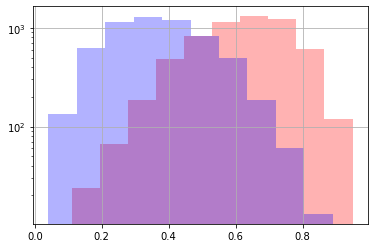

In [105]:
ax=data_to_predict_shuffled[data_to_predict_shuffled['gender_female']==1]['femaleness_2_new_following'].hist(log=True, color="red", alpha=0.3)
data_to_predict_shuffled[data_to_predict_shuffled['gender_female']==0]['femaleness_2_new_following'].hist(ax=ax, log=True, color="blue", alpha=0.3)

In [ ]:
#shap.summary_plot(rfc_gh, X_test)

In [106]:
# LOGIT
logit = sm.Logit(data_to_predict_shuffled[target], data_to_predict_shuffled[cs3])
result = logit.fit()
print(result.summary())
res_bh=results_summary_to_dataframe(result)

Optimization terminated successfully.
         Current function value: 0.665258
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          gender_female   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11988
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 May 2024   Pseudo R-squ.:                 0.04024
Time:                        11:48:23   Log-Likelihood:                -7983.1
converged:                       True   LL-Null:                       -8317.8
Covariance Type:            nonrobust   LLR p-value:                2.013e-136
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
# of projects           0.0075      0.002      3.402      0.001       0.003       0.012
To

In [107]:
data_bh=data_bh.set_index('user_id').join(data_to_predict_shuffled['femaleness_2_new_following'])

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score_bh = cross_val_score(rfc_bh, data_to_predict_shuffled[cs3], data_to_predict_shuffled[target], cv=5, scoring='roc_auc', n_jobs=-1)

In [109]:

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, np.round(rfc_predict_bh)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, np.round(rfc_predict_bh)))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score_bh)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score_bh.mean())

=== Confusion Matrix ===
[[1158  621]
 [ 684 1137]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1779
           1       0.65      0.62      0.64      1821

    accuracy                           0.64      3600
   macro avg       0.64      0.64      0.64      3600
weighted avg       0.64      0.64      0.64      3600



=== All AUC Scores ===
[0.67385675 0.68724005 0.68628786 0.67399243 0.6783246 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6799403365149279


# SHAP



In [110]:
import shap
#import pandas as pd
#import numpy as np
shap.initjs()
#print(rfpimp.cross_val_score(rfc_gh, X_test1, pd.DataFrame(y_test1)))

In [111]:
explainer_gh = shap.Explainer(rfc_gh)
shap_values_gh = explainer_gh.shap_values(X_test1)

In [112]:
explainer_bh = shap.Explainer(rfc_bh)
shap_values_bh = explainer_gh.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


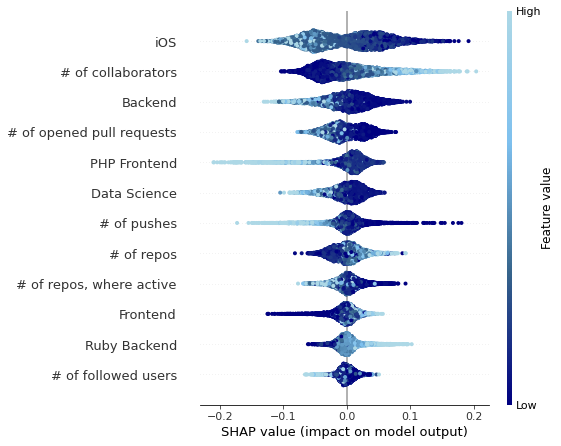

In [113]:
shap.summary_plot(shap_values_gh, X_test1, cmap=newCmap4, show=False)
fig_github = plt.gcf()
fig_github.savefig('GitHub_shap2.pdf')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


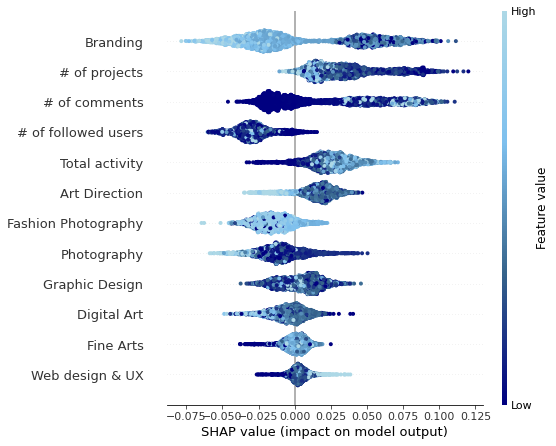

In [114]:
shap.summary_plot(shap_values_bh, X_test, cmap=newCmap4, show=False)
fig_behance = plt.gcf()
fig_behance.savefig('Behance_shap2.pdf')

In [ ]:
#behance=shap.summary_plot(shap_values_bh, X_test, cmap=newCmap4)

In [ ]:
github=shap.summary_plot(shap_values, X_test1, cmap=newCmap4)

In [ ]:
shap.plots.waterfall(shap_values_gh[1])

In [ ]:
shap.plots.waterfall(shap_values_gh)

In [ ]:
# create the explainer
#exp = shap.Explainer(model) 

# explain dataframe without fancy / readable column values
#sh = exp(X_raw)

# associate a list of column names
sh.feature_names = X_raw.rename(columns=COLUMNS_NAME_MAP).columns.tolist()
Additionally, if you want to display readable feature values, such as Male/Female instead of 0/1, you could exploit the display_data parameter.

sh.display_data = X_readable.values

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5), sharex=False, sharey=True)
fig.tight_layout()
sns.distplot(data_gh[data_gh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2, 'shade': True, "bw_method":.6}, ax=ax1, label='male')
ax1.axvline(x=data_gh[data_gh['gender']=='male']['femaleness_2_new_following'].median(), color='darkgreen', linestyle='--', linewidth=1, alpha=1)
ax1.text(data_gh[data_gh['gender']=='male']['femaleness_2_new_following'].median()+.02, .1,  "Males' median" , rotation=90, verticalalignment='bottom', color='darkgreen', fontsize=16)

#ax1.axvline(x=.5, color='darkorange', linestyle='--', linewidth=1, alpha=1)
#ax1.text(.52, .1,  "Females' median - baseline" , rotation=90, verticalalignment='bottom', color='orange')


sns.distplot(data_gh[data_gh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True,
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.6}, ax=ax1, label='female')

ax1.axvline(x=data_gh[data_gh['gender']=='female']['femaleness_2_new_following'].median(), color='darkorange', linestyle='--', linewidth=1, alpha=1)
ax1.text(data_gh[data_gh['gender']=='female']['femaleness_2_new_following'].median()+.02, .1,  "Females' median" , rotation=90, verticalalignment='bottom', color='darkorange', fontsize=16)

#ax1.axvline(x=.42, color='darkgreen', linestyle='--', linewidth=1, alpha=1)
#ax1.text(.44, .1,  "Males' median - baseline" , rotation=90, verticalalignment='bottom', color='green')


sns.distplot(data_bh[data_bh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax2, label='male')


ax2.axvline(x=data_bh[data_bh['gender']=='male']['femaleness_2_new_following'].median(), color='green', linestyle='--', linewidth=1, alpha=1)
ax2.text(data_bh[data_bh['gender']=='male']['femaleness_2_new_following'].median()+.02, .1,  "Males' median" , rotation=90, verticalalignment='bottom', color='green', fontsize=16)

sns.distplot(data_bh[data_bh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax2, label='female')

ax2.axvline(x=data_bh[data_bh['gender']=='female']['femaleness_2_new_following'].median(), color='darkorange', linestyle='--', linewidth=1, alpha=1)
ax2.text(data_bh[data_bh['gender']=='female']['femaleness_2_new_following'].median()+.02, .1,  "Females' median" , rotation=90, verticalalignment='bottom', color='darkorange', fontsize=16)

ax1.set_title("GitHub", fontsize=20)
ax2.set_title('Behance', fontsize=20)
ax1.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)


ax1.set_ylabel("Density of femaleness", fontsize=20)
ax1.set_xlabel('')
ax2.set_xlabel('Femaleness', fontsize=20)
ax2.xaxis.set_label_coords(-0.1, -.1)

plt.savefig('/Users/vorsi/Dropbox/behance-data/NEW_ANALYSIS/python_scripts/Femaleness_density.pdf', bbox_inches='tight')

In [ ]:
#CV_imp_bh=cv_importances(rfc_bh, X_train, y_train, k=5)
#plot_importances(CV_imp_bh)

In [ ]:
#I_drop_bh= dropcol_importances(rfc_bh, X_train, y_train)
#plot_importances(I_drop_bh)

# Visualize importances

In [ ]:
import seaborn as sns

In [ ]:
def minimal_bar(series,color_series, ax=None, width=0.9,
               reorder_yaxis=True, splines_off=True, delete_ticks=True, y_label_large=True, display_value=True, plot_line=True):

    if ax is None:
        fig, ax = plt.subplots()

    # 1. Delete legend legend=False
    # 2. Tighten the space between bars width=0.8
    series.plot(kind='barh', legend=False, ax=ax, width=width, color=color_series);
    
    # 3. Re-order the y-axis
    if reorder_yaxis:
        ax.invert_yaxis()

    # 4. Delete the square spines
    if splines_off:
        [spine.set_visible(False) for spine in ax.spines.values()]

    # 5. Delete ticks for x and y axis
    # 6. Delete tick label for x axis
    if delete_ticks:
        ax.tick_params(bottom=False, left=False, labelbottom=False)

    # 7. Increase the size of the label for y axis
    if y_label_large:
        ax.tick_params(axis='y', labelsize='x-large')

    # 8. Display each value next to the bar
    if display_value:
        vmax = series.max()
        for i, value in enumerate(series):
            ax.text(value+vmax*0.002, i, f'{np.round(value,2):,}', fontsize='x-large', va='center', color='black')
    if plot_line:
        plt.axvline(x=1, color='grey', linestyle='--')

In [ ]:
new_labels_gh={"pushes":'# of pushes', 
              "n_repos": "# of repos", 
               "collaborators":'# of collaborators', 
              "following": '# of followed users',
               "reposwhereactive":'# of repos, where active', 
               'Ruby_Backend': "Ruby Backend",
               "Data_Science": "Data Science",
               "PHP_Frontend": "PHP Frontend",
               'PRo':'# of opened pull requests'}

In [ ]:
new_labels_bh={"project_counts":'# of projects', 
               'total activity': 'Total activity',
              "comments": "# of comments", 
              "following": '# of followed users',
               "Graphic_Design":"Graphic Design",
               "Web_design_UX":'Web design & UX', 
               'Digital_Art': "Digital Art",
               "Fashion_Photography": "Fashion Photography",
               "Art_Direction": "Art Direction",
               'Fine_Arts':'Fine Arts'}

In [ ]:
res_bh=res_bh.T.rename(columns=new_labels_bh).T

In [ ]:
res_gh=res_gh.T.rename(columns=new_labels_gh).T

In [ ]:
res_gh

In [ ]:
I_permutation_gh=I_permutation_gh.T.rename(columns=new_labels_gh).T

In [ ]:
I_permutation_bh=I_permutation_bh.T.rename(columns=new_labels_bh).T

In [ ]:
I_permutation_bh

In [ ]:
res_bh=res_bh.T.rename(columns=new_labels_bh).T

In [ ]:
from scipy.stats import norm

In [ ]:
res_bh

In [ ]:
VARS_gh=I_permutation_gh.join(res_gh)
VARS_bh=I_permutation_bh.join(res_bh)

In [ ]:
def get_color(row):
    if row['OR']<1.0 and row['pvals']<0.05:
        return 'green'
    elif row['OR']>1.0 and row['pvals']<0.05:
        return 'orange'
    else:
        return 'gray'

In [ ]:
VARS_gh['color']=VARS_gh.apply(get_color,1)
VARS_bh['color']=VARS_bh.apply(get_color,1)

In [ ]:
VARS_bh

In [ ]:
#fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10,10))
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2, sharey = ax1)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5, sharey = ax4)
ax6 = fig.add_subplot(2, 3, 6)

ax1.set_title("Variable Importance", fontsize=15)
ax2.set_title("Female Univariate Odss Ratio", fontsize=15)
ax3.set_title('The Probability Density of Femaleness', fontsize=15)

minimal_bar(series=VARS_gh['Importance'], color_series=['#44AA99'for f in range(0,len(VARS_gh)+1)], ax=ax1, plot_line=False, delete_ticks=False, display_value=False)
minimal_bar(series=VARS_bh['Importance'], color_series=['indianred'for f in range(0,len(VARS_bh)+1)], ax=ax4, plot_line=False, delete_ticks=False, display_value=False)

minimal_bar(series=VARS_gh['OR'], color_series=VARS_gh['color'], delete_ticks=False, plot_line=False, display_value=False, ax=ax2)
minimal_bar(series=VARS_bh['OR'], color_series=VARS_bh['color'], delete_ticks=False, plot_line=False, display_value=False, ax=ax5)
ax2.axvline(x=1, color='black', linestyle='--')
ax5.axvline(x=1, color='black', linestyle='--')
ax2.set_xlim(0.,1.2)
ax5.set_xlim(0.,1.2)

sns.distplot(data_gh[data_gh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2, 'shade': True, "bw_method":.6}, ax=ax3, label='male')

sns.distplot(data_gh[data_gh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True,
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.6}, ax=ax3, label='female')
#ax3.legend()

sns.distplot(data_bh[data_bh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax6, label='male')
sns.distplot(data_bh[data_bh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax6, label='female')
ax3.legend(loc=2)

ax1.yaxis.set_label_coords(-1, 0.5)
ax4.yaxis.set_label_coords(-1, 0.5)
ax1.set_ylabel("GitHub", fontsize=15)
ax4.set_ylabel('Behance', fontsize=15)
#ax3.set_xlabel("")
#ax4.set_xlabel('')
ax3.set_xlabel("")
ax6.set_xlabel('')

#ax1.set_xlabel("")
#ax2.set_xlabel('')
#ax3.set_xlabel("")
#ax4.set_xlabel('')
ax3.set_xlabel("")
ax6.set_xlabel('')
#ax1.grid()
#ax2.grid()
#ax3.grid()
#ax6.grid()

plt.savefig('/Users/orsi/Dropbox/behance-data/NEW_ANALYSIS/Var_importance_no_values.pdf', bbox_inches='tight')

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 11})
#fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10,10))
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2, sharey = ax1)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5, sharey = ax5)
ax6 = fig.add_subplot(2, 3, 6)

ax1.set_title("Variable Importance", fontsize=14)
ax2.set_title("Female Univariate Odss Ratio", fontsize=14)
ax3.set_title('The Probability Density of Femaleness', fontsize=14)


minimal_bar(series=VARS_gh['Importance'], color_series=['#44AA99'for f in range(0,len(VARS_gh)+1)], ax=ax1, plot_line=False, delete_ticks=False)
minimal_bar(series=VARS_bh['Importance'], color_series=['indianred'for f in range(0,len(VARS_bh)+1)], ax=ax4, plot_line=False, delete_ticks=False)

minimal_bar(series=VARS_gh['OR'], color_series=VARS_gh['color'], delete_ticks=False, plot_line=False, ax=ax2)
minimal_bar(series=VARS_bh['OR'], color_series=VARS_bh['color'], delete_ticks=False, plot_line=False, ax=ax5)
ax2.axvline(x=1, color='darkgrey', linestyle='--', linewidth=.9, alpha=.8)
ax5.axvline(x=1, color='darkgrey', linestyle='--', linewidth=.9, alpha=.8)
ax2.set_xlim(0.,1.2)
ax5.set_xlim(0.,1.2)


#data_gh[data_gh['gender']=='male']['femaleness_2_new_following'].plot.kde(ax=ax3, 
#                                                                          linewidth=2,
#                                                            
#                                                                         label='male', 
#                                                                          
#                                                                          color='darkgreen')
sns.distplot(data_gh[data_gh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2, 'shade': True, "bw_method":.6}, ax=ax3, label='male')

sns.distplot(data_gh[data_gh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True,
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.6}, ax=ax3, label='female')
#ax3.legend()

sns.distplot(data_bh[data_bh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax6, label='male')
sns.distplot(data_bh[data_bh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax6, label='female')
ax3.legend(loc=2)

ax1.set_ylabel("GitHub", fontsize=15)
ax4.set_ylabel('Behance', fontsize=15)
ax1.yaxis.set_label_coords(-.8, 0.5)
ax4.yaxis.set_label_coords(-.8, 0.5)



#ax3.set_xlabel("")
#ax4.set_xlabel('')
ax3.set_xlabel("")
ax6.set_xlabel('')
#ax1.grid()
#ax2.grid()
ax3.grid()
ax6.grid()
plt.tight_layout()
plt.savefig('/Users/orsi/Dropbox/behance-data/NEW_ANALYSIS/Var_importance_with_values.pdf', bbox_inches='tight')

In [ ]:
from matplotlib.lines import Line2D

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 11})
fig, ((ax1, ax2), (ax4, ax5)) = plt.subplots(2,2, figsize=(15,12), sharex='col', sharey='row')
fig.subplots_adjust(wspace=0.5)
#fig ()= plt.figure(figsize=(20,10))

#ax1 = fig.add_subplot(2, 3, 1)
#ax2 = fig.add_subplot(2, 3, 2, sharey = ax1)
##ax3 = fig.add_subplot(2, 3, 3)
#ax4 = fig.add_subplot(2, 3, 4)
#ax5 = fig.add_subplot(2, 3, 5, sharey = ax5)
#ax6 = fig.add_subplot(2, 3, 6)

ax1.text(-0., -0.9, 'A',size=20, weight='bold')
ax2.text(-0., -0.9, 'B',size=20, weight='bold')
#ax4.text(-0., -0.9, 'C',size=20, weight='bold')
#ax5.text(-0., -0.9, 'D',size=20, weight='bold')
ax1.set_title("Variable Importance", fontsize=18)
ax2.set_title("Female Univariate Odds Ratio", fontsize=18)
#ax3.set_title('The Probability Density of Femaleness', fontsize=14)

minimal_bar(series=VARS_gh['Importance'], color_series=['#44AA99'for f in range(0,len(VARS_gh)+1)], ax=ax1, plot_line=False, delete_ticks=False)
minimal_bar(series=VARS_bh['Importance'], color_series=['indianred'for f in range(0,len(VARS_bh)+1)], ax=ax4, plot_line=False, delete_ticks=False)

minimal_bar(series=VARS_gh['OR'], color_series=VARS_gh['color'], delete_ticks=False, plot_line=False, ax=ax2)
minimal_bar(series=VARS_bh['OR'], color_series=VARS_bh['color'], delete_ticks=False, plot_line=False, ax=ax5)
ax2.axvline(x=1, color='darkgrey', linestyle='--', linewidth=.9, alpha=.8)
ax5.axvline(x=1, color='darkgrey', linestyle='--', linewidth=.9, alpha=.8)
ax2.set_xlim(0.,1.2)
ax5.set_xlim(0.,1.2)
legend_elements = [Line2D([0], [0], marker='s',color="w", alpha=1,label='Female', markerfacecolor='orange', markersize=13),
                   Line2D([0], [0], marker='s',color="w", alpha=1,label='Male', markerfacecolor='green', markersize=13),
                  Line2D([0], [0], marker='s',color="w", alpha=1,label='Not\nsignificant', markerfacecolor='gray', markersize=13)]


#data_gh[data_gh['gender']=='male']['femaleness_2_new_following'].plot.kde(ax=ax3, 
#                                                                          linewidth=2,
#                                                            
#                                                                         label='male', 
#                                                                          
#                                                                          color='darkgreen'
ax2.legend(handles=legend_elements, loc='upper left', ncol=1, fontsize=14, bbox_to_anchor=(1., 1.))

ax1.set_ylabel("GitHub", fontsize=15)
ax4.set_ylabel('Behance', fontsize=15)
ax1.yaxis.set_label_coords(-.6, 0.5)
ax4.yaxis.set_label_coords(-.6, 0.5)



#ax3.set_xlabel("")
#ax4.set_xlabel('')
#ax3.set_xlabel("")
#ax6.set_xlabel('')
#ax1.grid()
#ax2.grid()
#ax3.grid()
#ax6.grid()
plt.tight_layout()
plt.savefig('/Users/orsi/Dropbox/behance-data/NEW_ANALYSIS/Var_importance_with_values.pdf', bbox_inches='tight')

In [ ]:
data_gh[data_gh['gender']=='male']['femaleness_2_new_following'].median()

In [ ]:
data_gh[data_gh['gender']=='male']['femaleness_2_new_following'].describe()

In [ ]:
data_gh[data_gh['gender']=='female']['femaleness_2_new_following'].describe()

In [ ]:
github: 0.2, 0.8, [0.03, 0.89 ; 0.16, 0.995] ; behance: 0.37, 0.63  [0.03, 0.87 ], [ 0.095, 0.94], 

In [ ]:
data_bh[data_bh['gender']=='female']['femaleness_2_new_following'].describe()

In [ ]:
data_bh[data_bh['gender']=='male']['femaleness_2_new_following'].describe()

# DENSITY PLOT

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5), sharex=False, sharey=True)

sns.distplot(data_gh[data_gh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2, 'shade': True, "bw_method":.6}, ax=ax1, label='male')
ax1.axvline(x=.2, color='darkgreen', linestyle='--', linewidth=1, alpha=1)
ax1.text(.22, .1,  "Males' median" , rotation=90, verticalalignment='bottom', color='darkgreen')

ax1.axvline(x=.5, color='darkorange', linestyle='--', linewidth=1, alpha=1)
ax1.text(.52, .1,  "Females' median - baseline" , rotation=90, verticalalignment='bottom', color='orange')


sns.distplot(data_gh[data_gh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True,
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.6}, ax=ax1, label='female')

ax1.axvline(x=.8, color='darkorange', linestyle='--', linewidth=1, alpha=1)
ax1.text(.82, .1,  "Females' median" , rotation=90, verticalalignment='bottom', color='darkorange')

ax1.axvline(x=.42, color='darkgreen', linestyle='--', linewidth=1, alpha=1)
ax1.text(.44, .1,  "Males' median - baseline" , rotation=90, verticalalignment='bottom', color='green')


sns.distplot(data_bh[data_bh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax2, label='male')


ax2.axvline(x=0.37, color='green', linestyle='--', linewidth=1, alpha=1)
ax2.text(.39, .1,  "Males' median" , rotation=90, verticalalignment='bottom', color='green')

sns.distplot(data_bh[data_bh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax2, label='female')

ax2.axvline(x=.63, color='darkorange', linestyle='--', linewidth=1, alpha=1)
ax2.text(.65, .1,  "Females' median" , rotation=90, verticalalignment='bottom', color='darkorange')

ax1.set_title("GitHub", fontsize=15)
ax2.set_title('Behance', fontsize=15)


ax1.set_ylabel("Density of femaleness", fontsize=15)
ax1.set_xlabel('')
ax2.set_xlabel('Femaleness', fontsize=15)
ax2.xaxis.set_label_coords(-0.1, -.1)

plt.savefig('/Users/orsi/Dropbox/behance-data/NEW_ANALYSIS/Femaleness_density.pdf', bbox_inches='tight')

In [ ]:
fig, ((ax1,ax3), (ax2, ax4)) = plt.subplots(2,2, figsize=(10,10), sharex=False, sharey=False)

ax1.set_title("Variable Importance")
ax3.set_title('The probability density of femaleness')


minimal_bar(series=VARS_gh['Importance'], ax=ax1)
minimal_bar(series=VARS_gh['Importance'], ax=ax2)

#data_gh[data_gh['gender']=='male']['femaleness_2_new_following'].plot.kde(ax=ax3, 
#                                                                          linewidth=2,
#                                                            
#                                                                         label='male', 
#                                                                          
#                                                                          color='darkgreen')
sns.distplot(data_gh[data_gh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2, 'shade': True, "bw_method":.6}, ax=ax3, label='male')

sns.distplot(data_gh[data_gh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True,
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.6}, ax=ax3, label='female')
ax3.legend()

sns.distplot(data_bh[data_bh['gender']=='male']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'darkgreen'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax4, label='male')
sns.distplot(data_bh[data_bh['gender']=='female']['femaleness_2_new_following'], hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 2,  'shade': True, "bw_method":.3}, ax=ax4, label='female')
ax4.legend()


ax1.set_xlabel("")
ax2.set_xlabel('')
ax3.set_xlabel("")
ax4.set_xlabel('')
#ax1.grid()
#ax2.grid()
ax3.grid()
ax4.grid()


plt.savefig('/Users/orsi/Dropbox/behance-data/NEW_ANALYSIS/Var_importance.pdf')

# PDP

In [ ]:
import dalex as dx

In [ ]:


exp_f_bh = dx.Explainer(BH_mod,  data_bh[data_bh['gender_female']==1][bh_cs[:-1]].replace(np.nan,0), data_bh[data_bh['gender_female']==1][target],
                          label = "RF")

model_f_bh = exp_f_bh.model_profile(variables = bh_cs[:-1])
F_bh=pd.DataFrame(model_f_bh.result)


exp_m_bh = dx.Explainer(BH_mod,  data_bh[data_bh['gender_female']==0][bh_cs[:-1]].replace(np.nan,0), data_bh[data_bh['gender_female']==0][target],
                          label = "RF")

model_m_bh = exp_m_bh.model_profile(variables = bh_cs[:-1])
M_bh=pd.DataFrame(model_m_bh.result)
#mp=exp.model_performance(model_type = 'classification')
#acu=pd.DataFrame(mp.result)

In [ ]:
from pdpbox import pdp, get_dataset, info_plots


In [ ]:
#mp_bh=exp.model_performance(model_type = 'classification')
#acu=pd.DataFrame(mp.result)

In [ ]:
#data_bh[data_bh['gender_female']==0][cs[:-1]].replace(np.nan,0), data_bh[data_bh['gender_female']==0][target],

In [ ]:
pdp_female = pdp.pdp_isolate(model=BH_mod, dataset=data_bh[data_bh['gender_female']==1].replace(np.nan,0), model_features=bh_cs[:-1], feature=bh_cs[0])
pdp_male = pdp.pdp_isolate(model=BH_mod, dataset=data_bh[data_bh['gender_female']==0].replace(np.nan,0), model_features=bh_cs[:-1], feature=bh_cs[0])
F_mean=pdp_female.ice_lines.mean()
F_std=pdp_female.ice_lines.std()
M_mean=pdp_male.ice_lines.mean()
M_std=pdp_male.ice_lines.std()
#    ax1.plot(M['_x_'],M["_yhat_"], color='green', label='Male', linewidth=3)
#   ax1.plot(F['_x_'],F["_yhat_"], color='orange', label='Female',linewidth=3)
 #   ax1.grid()

In [ ]:
F=pd.DataFrame(pdp_female.ice_lines.mean()).rename(columns={0:'mean_female'}).join(pd.DataFrame(pdp_female.ice_lines.std()).rename(columns={0:'std_female'}))

In [ ]:
M=pd.DataFrame(pdp_male.ice_lines.mean()).rename(columns={0:'mean_male'}).join(pd.DataFrame(pdp_male.ice_lines.std()).rename(columns={0:'std_male'}))

In [ ]:
fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(10,6))

#ax1=axs[0,0]
i=0
for ax1,i in zip(axs.reshape(-1), range(0, len(bh_cs))):
    print(cs[i])
    pdp_female = pdp.pdp_isolate(model=BH_mod, dataset=data_bh[data_bh['gender_female']==1].replace(np.nan,0), model_features=bh_cs[:-1], feature=bh_cs[i])
    pdp_male = pdp.pdp_isolate(model=BH_mod, dataset=data_bh[data_bh['gender_female']==0].replace(np.nan,0), model_features=bh_cs[:-1], feature=bh_cs[i])
    F_mean=pdp_female.ice_lines.mean()
    F_std=pdp_female.ice_lines.std()
    M_mean=pdp_male.ice_lines.mean()
    M_std=pdp_male.ice_lines.std()
    
    F=pd.DataFrame(pdp_female.ice_lines.mean()).rename(columns={0:'mean_female'}).join(pd.DataFrame(pdp_female.ice_lines.std()).rename(columns={0:'std_female'}))
    M=pd.DataFrame(pdp_male.ice_lines.mean()).rename(columns={0:'mean_male'}).join(pd.DataFrame(pdp_male.ice_lines.std()).rename(columns={0:'std_male'}))
    F['mean_female'].plot( color='darkorange', linewidth=3, ax=ax1)
    ax1.fill_between(F.index,
                     F['mean_female']-F['std_female'],
                     F['mean_female']+F['std_female'],
                     facecolor='orange', alpha=0.1)

    M['mean_male'].plot( color='darkgreen', ax=ax1, linewidth=3)
    ax1.fill_between(M.index,
                     M['mean_male']-M['std_male'],
                     M['mean_male']+M['std_male'],
                     facecolor='green', alpha=0.1)

    ax1.grid()
    ax1.set_title(cs[i].replace('_', ' '))
    if i==0 or i==6:
        ax1.set_ylabel('Predicted Success',fontsize=13)
    if i<3:
        ax1.set_xlim(10,65)
    if i==3:
        ax1.set_xlim(0,500)
    if i==4:
        ax1.set_xlim(0,10)
    if i==5:
        ax1.set_xlim(-5,5)
    if i==6:
        ax1.set_xlim(-5,5)
    if i>=7:
        ax1.set_xlim(-5,5)
    #field_name=pdps[i].split("LOGIT_PDP_NEWF_")[1].split('_top')[0].replace('_',' ')
    #ax1.set_title(field_name)
    if i == 12:
        ax1.legend(bbox_to_anchor=(1.1, 1.))
    i+=1
plt.savefig("PDP_Behance.pdf")

In [ ]:
fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(10,14))

#ax1=axs[0,0]
i=0
for ax1,i in zip(axs.reshape(-1), range(0, len(gh_cs))):
    print(gh_cs[i])
    pdp_female = pdp.pdp_isolate(model=GH_mod, dataset=data_gh[data_gh['gender_female']==1].replace(np.nan,0), model_features=gh_cs[:-1], feature=gh_cs[i])
    pdp_male = pdp.pdp_isolate(model=BH_mod, dataset=data_gh[data_gh['gender_female']==0].replace(np.nan,0), model_features=gh_cs[:-1], feature=gh_cs[i])
    F_mean=pdp_female.ice_lines.mean()
    F_std=pdp_female.ice_lines.std()
    M_mean=pdp_male.ice_lines.mean()
    M_std=pdp_male.ice_lines.std()
    
    F=pd.DataFrame(pdp_female.ice_lines.mean()).rename(columns={0:'mean_female'}).join(pd.DataFrame(pdp_female.ice_lines.std()).rename(columns={0:'std_female'}))
    M=pd.DataFrame(pdp_male.ice_lines.mean()).rename(columns={0:'mean_male'}).join(pd.DataFrame(pdp_male.ice_lines.std()).rename(columns={0:'std_male'}))
    F['mean_female'].plot( color='darkorange', linewidth=3, ax=ax1)
    ax1.fill_between(F.index,
                     F['mean_female']-F['std_female'],
                     F['mean_female']+F['std_female'],
                     facecolor='orange', alpha=0.1)

    M['mean_male'].plot( color='darkgreen', ax=ax1, linewidth=3)
    ax1.fill_between(M.index,
                     M['mean_male']-M['std_male'],
                     M['mean_male']+M['std_male'],
                     facecolor='green', alpha=0.1)

    ax1.grid()
    ax1.set_title(gh_cs[i].replace('_', ' '))
    if i==0 or i==6:
        ax1.set_ylabel('Predicted Success',fontsize=13)
    if i==0:
        ax1.set_xlim(10,100)
    if i==1:
        ax1.set_xlim(0,100)
    if i==2:
        ax1.set_xlim(10,50)
    if i==3:
        ax1.set_xlim(10,200)
    if i==4:
        ax1.set_xlim(0,50)
    if i==5:
        ax1.set_xlim(1,250)
    if i==6:
        ax1.set_xlim(-5,30)
    if i==7:
        ax1.set_xlim(-50,50)
    if i==8:
        ax1.set_xlim(-7,10)
    if i==9:
        ax1.set_xlim(-11,10)
    if i==10:
        ax1.set_xlim(-10,60)
    if i==11:
        ax1.set_xlim(-10,50)
    #field_name=pdps[i].split("LOGIT_PDP_NEWF_")[1].split('_top')[0].replace('_',' ')
    #ax1.set_title(field_name)
    if i == 12:
        ax1.legend(bbox_to_anchor=(1.1, 1.))
    i+=1
plt.savefig("PDP_GitHUB.pdf")

In [ ]:
data_bh_p

In [ ]:
data_bh.to_csv(data_bh_p+"Behance_data_sample1_10_01_2021.csv")

In [ ]:
data_gh.to_csv(data_gh_p+"GitHUB_data_sample1_10_01_2021.csv")

In [ ]:
data_gh_p

In [ ]:
#/Users/orsi/Dropbox/behance-data/NEW_ANALYSIS/data/github/GitHUB_data_sample1_10_01_2021.csv